In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

# DataSet

In [4]:
df = pd.read_csv("./USA_Housing.csv")
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# DataAnalysis

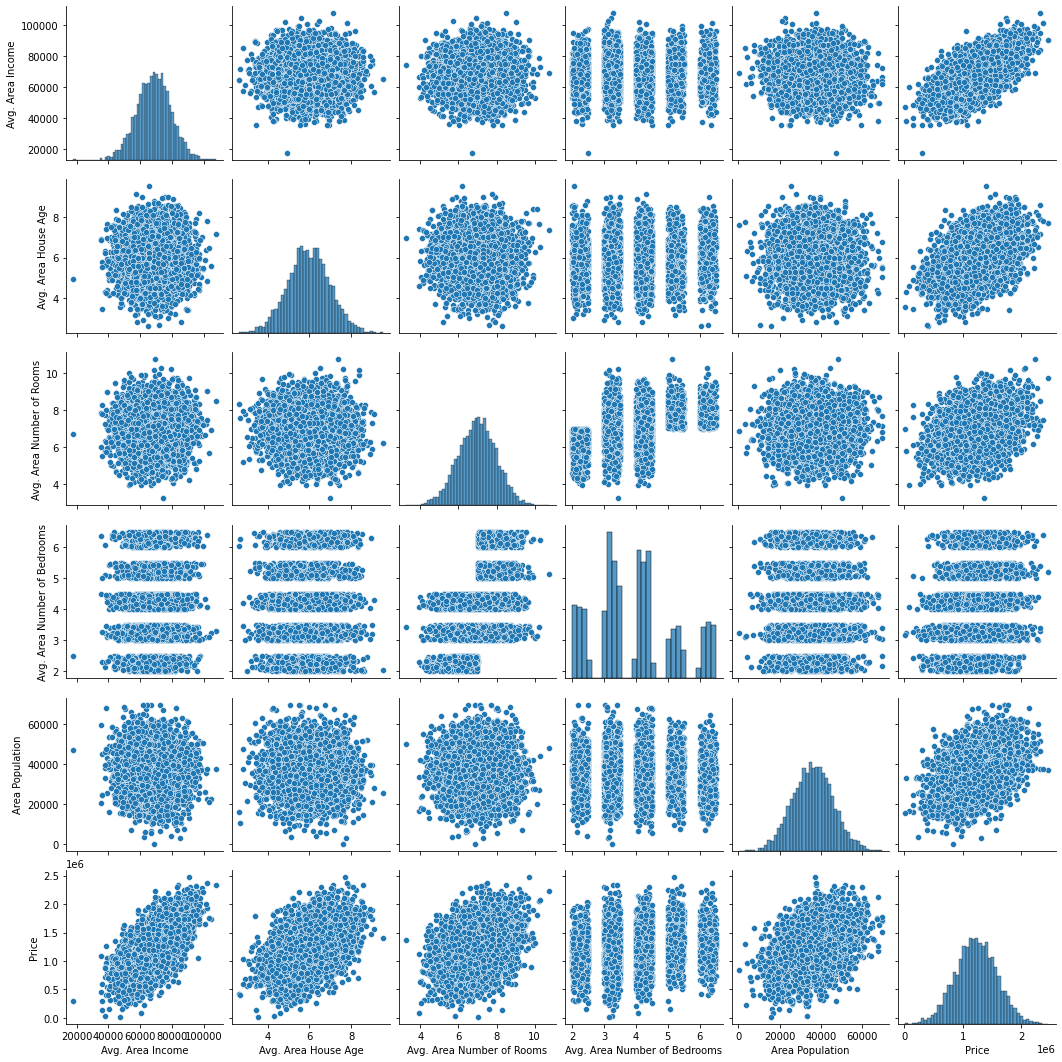

In [8]:
sns.pairplot(df)
plt.show()

In [11]:
df.hvplot.hist(by='Price',subplots=False,width=1000)

:NdOverlay   [Element]
   :Histogram   [Area Population]   (Area Population_count)

<AxesSubplot:>

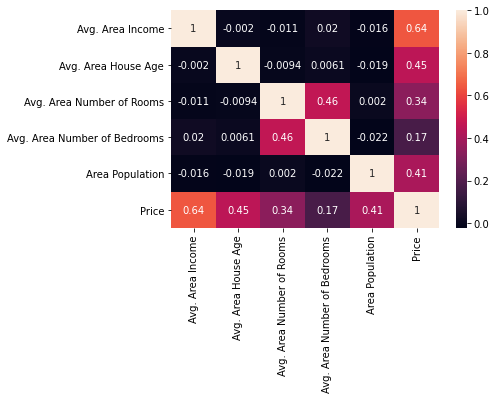

In [15]:
sns.heatmap(df.corr(),annot=True)

# Data Splitting

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4000, 5) (4000,) (1000, 5) (1000,)


In [20]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [26]:
def cross_val(model):
    pred = cross_val_score(model,X,y,cv=18)
    return pred.mean()
def printEval(y,y_):
    mae = metrics.mean_absolute_error(y,y_)
    mse = metrics.mean_squared_error(y,y_)
    rmse = np.sqrt(mse)
    r2_sq = metrics.r2_score(y,y_)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_sq)
    print('__________________________________')

# Data PreProcessing

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Ridge Linear Regression

In [23]:
from sklearn.linear_model import Ridge

In [27]:
model = Ridge(alpha=100, solver='cholesky',tol=0.0001)
model.fit(X_train,y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
printEval(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
printEval(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 80995.02167280122
MSE: 10162063037.444979
RMSE: 100807.05847035206
R2 Square 0.9174033945344908
__________________________________
Train set evaluation:
_____________________________________
MAE: 81925.75280276715
MSE: 10331167369.014242
RMSE: 101642.3502729755
R2 Square 0.9173801693353605
__________________________________


# Lasso Linear Regression

In [32]:
from sklearn.linear_model import Lasso

In [33]:
model = Lasso(alpha=0.1, precompute=True,positive=True, selection='random')
model.fit(X_train,y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
printEval(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
printEval(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 80879.09405886206
MSE: 10089008949.408348
RMSE: 100444.05880592614
R2 Square 0.9179971735402862
__________________________________
Train set evaluation:
_____________________________________
MAE: 81509.39582336941
MSE: 10256318867.526703
RMSE: 101273.48551090114
R2 Square 0.9179787435620205
__________________________________
